## <font color="Red"> 2.3 二值化彩色影像
<font color="Red">  設計一個函數 def imgBinQuan(img)，呼叫時輸入 img ，傳回『二值化彩色影像』結果。   
影像的像素小於128，都改成0       
影像的像素大於127，都改成255       
https://iter01.com/561616.html  

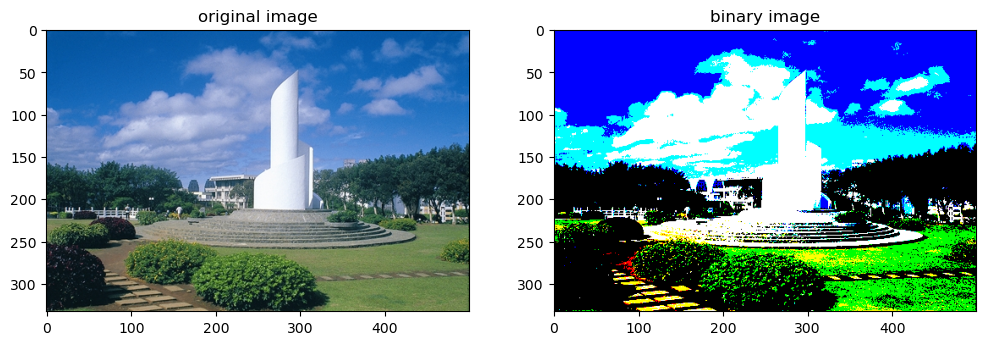

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imgBinQuan(img):
    # 獲取影像的高度和寬度
    nr,nc = img.shape[:2]
    # 建立一幅影像，內容使用零填充
    new_img = np.zeros((nr, nc, 3), np.uint8)
    for i in range(nr):
        for j in range(nc):
            for k in range(3):  # 對應RGB三通道
#------------------- Code Here -------------------#                    
                if(img[i, j, k] < 128):
                    new_img[i, j, k] = 0
            
                else:
                    new_img[i, j, k] = 255
#------------------- Code Here -------------------#                    
    return new_img 

imgBGR = cv2.imread('Commons.jpeg')
imgRGB = imgBGR[:,:,::-1]

binImg = imgBinQuan(imgRGB)

# 顯示影像
plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(imgRGB)
plt.subplot(1,2,2)   
plt.title('binary image') 
plt.imshow(binImg)

## <font color="Red"> 2.3.a 方法2   
將上述的for迴圈，改成使用 cv2.threshold

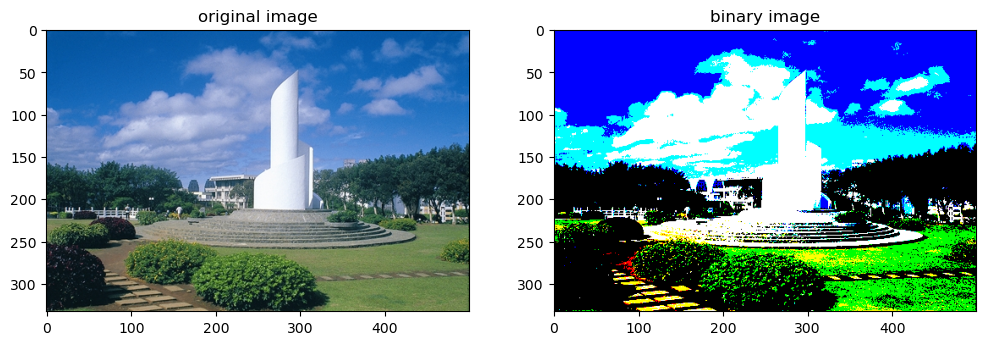

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imgBinQuan(img):
    # 獲取影像的高度和寬度
    nr,nc = img.shape[:2]
    # 建立一幅影像，內容使用零填充
    new_img = np.zeros((nr, nc, 3), np.uint8)
#------------------- Code Here -------------------#       
    new_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
#------------------- Stop Here -------------------#   
    return new_img 

imgBGR = cv2.imread('Commons.jpeg')
imgRGB = imgBGR[:,:,::-1]

binImg = imgBinQuan(imgRGB)

# 顯示影像
plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(imgRGB)
plt.subplot(1,2,2)   
plt.title('binary image') 
plt.imshow(binImg)

## <font color="Red"> 2.3.b 方法3   
將上述的for迴圈，改成使用 cv2.adaptiveThreshold

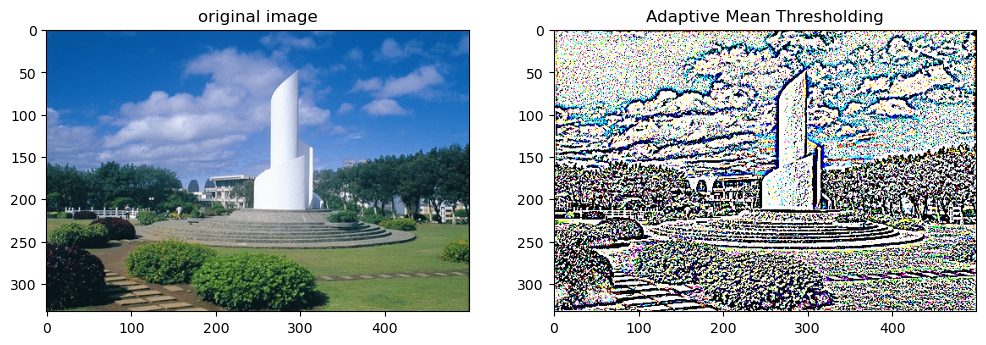

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imgBinQuan(img):
    # 獲取影像的高度和寬度
    nr,nc = img.shape[:2]
    # 建立一幅影像，內容使用零填充
    new_img = np.zeros((nr, nc, 3), np.uint8)
#------------------- Code Here -------------------#           
    for i in range(3):
        new_img[:,:,i] = cv2.adaptiveThreshold(img[:,:,i], 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
#------------------- Stop Here -------------------#   
    return new_img 

imgBGR = cv2.imread('Commons.jpeg')
imgRGB = imgBGR[:,:,::-1]

binImg = imgBinQuan(imgRGB)

# 顯示影像
plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(imgRGB)
plt.subplot(1,2,2)   
plt.title('Adaptive Mean Thresholding') 
plt.imshow(binImg)


##  <font color="Red"> 2.4 Complement (灰色負片)
影像 𝑓(𝑥,𝑦) 的負片計算(Complement)     
𝑐(𝑥,𝑦) = 255 − 𝑓(𝑥,𝑦)     
兩張影像 𝑓(𝑥,𝑦) 與 g(𝑥,𝑦) 的聯集計算(Union)     
𝑓 ∪ 𝑔 = {max⁡(𝑎,𝑏) | 𝑎∈𝑓, 𝑏∈𝑔}     
    
#### <font color="Red">1. 請設計一個函式image_complement，計算一張灰色影像的負片並傳回結果
#### <font color="Red">(請分別練習255-f與迴圈計算方式)     
#### <font color="Red">2. 請設計一個函式image_union，計算一張灰色影像的聯集並傳回結果
#### <font color="Red">(請練習迴圈計算方式)        
<img src="IP2_1.png" width="800px">    

<Figure size 1600x1200 with 0 Axes>

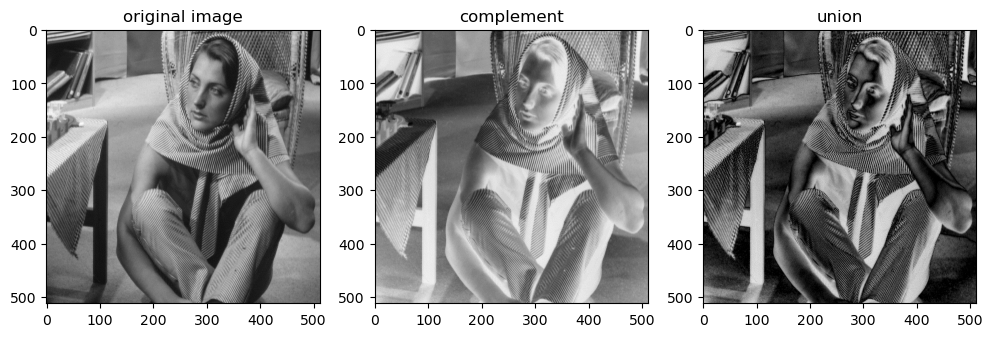

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def image_complement( f ):
    nr, nc = f.shape[:2]
    imgComplemet = np.zeros( [ nr, nc ], dtype = 'uint8' )
#------------------- Code Here -------------------#         
    for x in range(nr):
        for y in range(nc):
            imgComplemet[x][y] = 255 - f[x][y]
            
    #imgComplemet = 255 - f
#------------------- Stop Here -------------------#                 
    return imgComplemet

def image_union( f, g ):
    nr, nc = f.shape[:2]
    u = np.zeros( [ nr, nc ], dtype = 'uint8' )
#------------------- Code Here -------------------#      
    for x in range(nr):
        for y in range(nc):
            u[x][y] = max(g[x][y] , f[x][y])
#------------------- Stop Here -------------------#                 
    return u


img1 = cv2.imread( "Barbara.bmp", -1 )
img2 = image_complement( img1 )
img3 = image_union( img1, img2 )

plt.figure(figsize=(16, 12))    
titles = ['original image', 'complement', 'union']
images = [img1, img2, img3]

plt.figure(figsize=(12, 10))
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i],cmap=plt.cm.gray)
    plt.title(titles[i])
plt.show()

##  <font color="Red"> 2.5 Complement (彩色負片)
影像 𝑓(𝑥,𝑦,z) 的負片計算(Complement)     
𝑐(𝑥,𝑦,z) = 255 − 𝑓(𝑥,𝑦,z)     
兩張影像 𝑓(𝑥,𝑦,z) 與 g(𝑥,𝑦,z) 的聯集計算(Union)     
𝑓 ∪ 𝑔 = {max⁡(𝑎,𝑏) | 𝑎∈𝑓, 𝑏∈𝑔}     
    
#### <font color="Red">1. 請設計一個函式image_complement，計算一張彩色影像的負片並傳回結果     
#### <font color="Red">2. 請設計一個函式image_union，計算一張彩色影像的聯集並傳回結果   
<img src="IP2_2.png" width="800px">  

<Figure size 1600x1200 with 0 Axes>

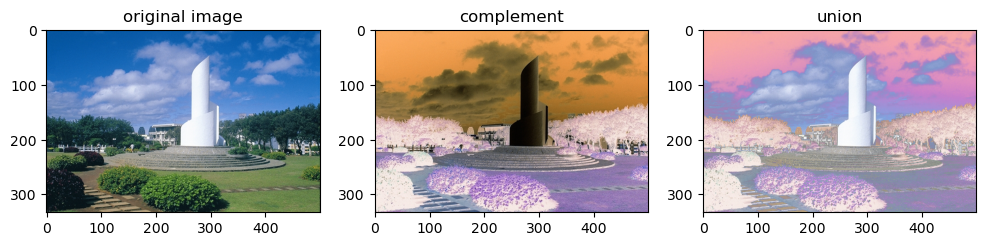

In [21]:
import numpy as np
import cv2

def image_complement( f ):
    nr, nc = f.shape[:2]
    g = np.zeros( [ nr, nc , 3], dtype = 'uint8' )
#------------------- Code Here -------------------#      
    g = 255 - f
#------------------- Stop Here -------------------#      
    return g

def image_union( f, g ):
    nr, nc = f.shape[:2]
    u = np.zeros( [ nr, nc ,3], dtype = 'uint8' )
#------------------- Code Here -------------------#      
    for x in range(nr):
        for y in range(nc):
            for z in range(3):
                u[x][y][z] = max(g[x][y][z] , f[x][y][z])
#------------------- Stop Here -------------------#  
    return u

imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR )
img1 = imgBGR[:,:,::-1]    
img2 = image_complement( img1 )
img3 = image_union( img1, img2 )
    
plt.figure(figsize=(16, 12))    
titles = ['original image', 'complement', 'union']
images = [img1, img2, img3]

plt.figure(figsize=(12, 10))
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i],cmap=plt.cm.gray)
    plt.title(titles[i])
plt.show()

## 2.6b 嘗試多種旋轉方式
1. 嘗試多種不同的旋轉角度      
2. 嘗試旋轉中心轉移到影像中心
2. 將影像改成 Commons.jpeg 

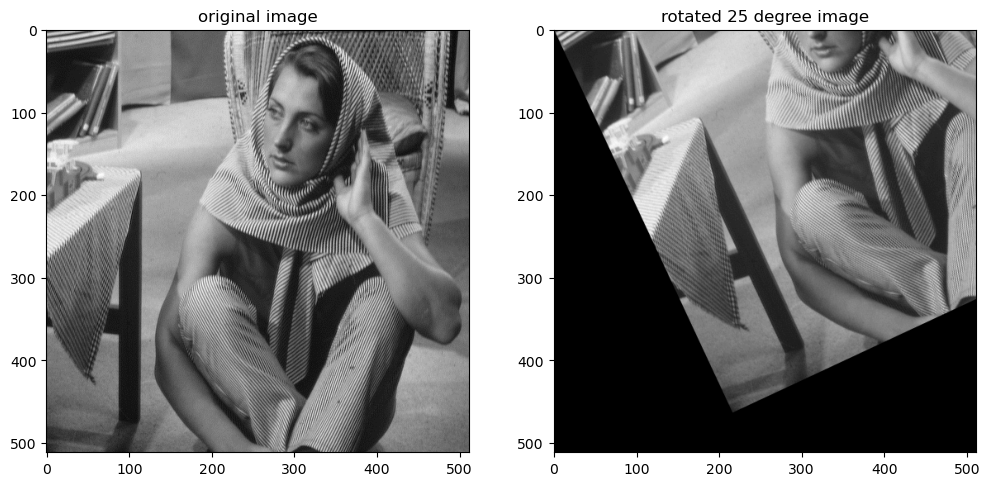

In [12]:
import numpy as np
import cv2

img = cv2.imread( "Barbara.bmp", -1 )
nr, nc = img.shape[:2]
#------------------- Code Here -------------------#   
degree = 25
center_r = 0
center_c = 0
#------------------- Stop Here -------------------#   
rotation_matrix = cv2.getRotationMatrix2D( ( center_r, center_c ), degree, 1 )
imgRotate = cv2.warpAffine( img, rotation_matrix, ( nr, nc ) ) 
 
plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(img,cmap=plt.cm.gray)
plt.subplot(1,2,2)   
plt.title('rotated '+str(degree)+ ' degree image'  ) 
plt.imshow(imgRotate,cmap=plt.cm.gray)

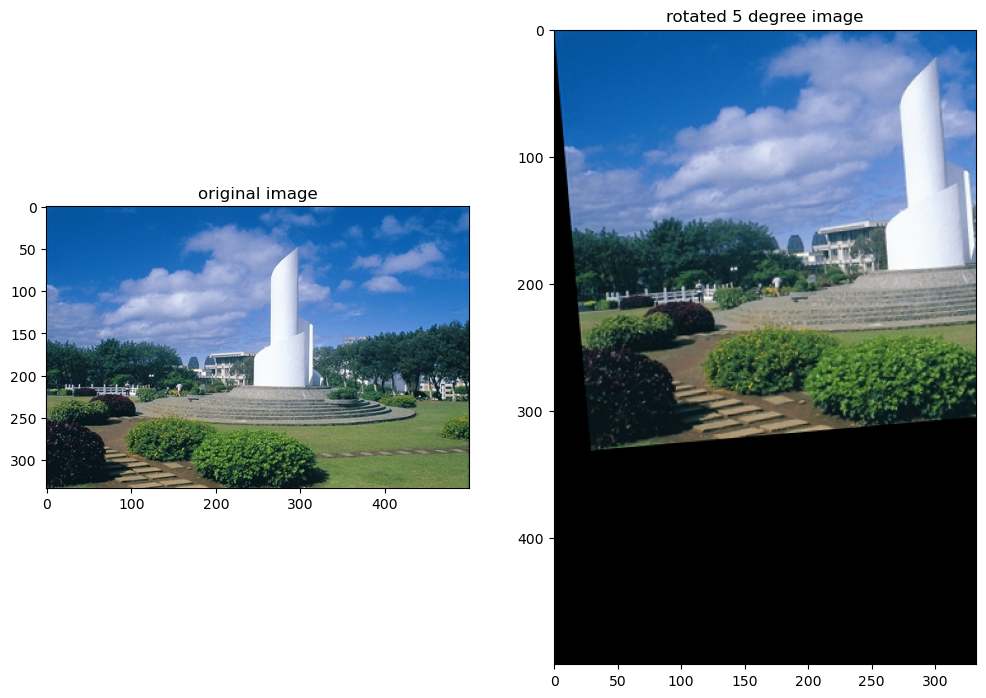

In [17]:
import numpy as np
import cv2

#------------------- Code Here -------------------# 
img = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR )
img = img[:,:,::-1]

nr, nc = img.shape[:2]

degree = 5
center_r = 0
center_c = 0
#------------------- Code Here -------------------#  
rotation_matrix = cv2.getRotationMatrix2D( ( center_r, center_c ), degree, 1 )
imgRotate = cv2.warpAffine( img, rotation_matrix, ( nr, nc ) ) 
 
plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(img,cmap=plt.cm.gray)
plt.subplot(1,2,2)   
plt.title('rotated '+str(degree)+ ' degree image'  ) 
plt.imshow(imgRotate,cmap=plt.cm.gray)

## <font color="Red">2.7a 練習擷取並透視轉換成新的影像
<img src="IP2_5.png" height="600px">


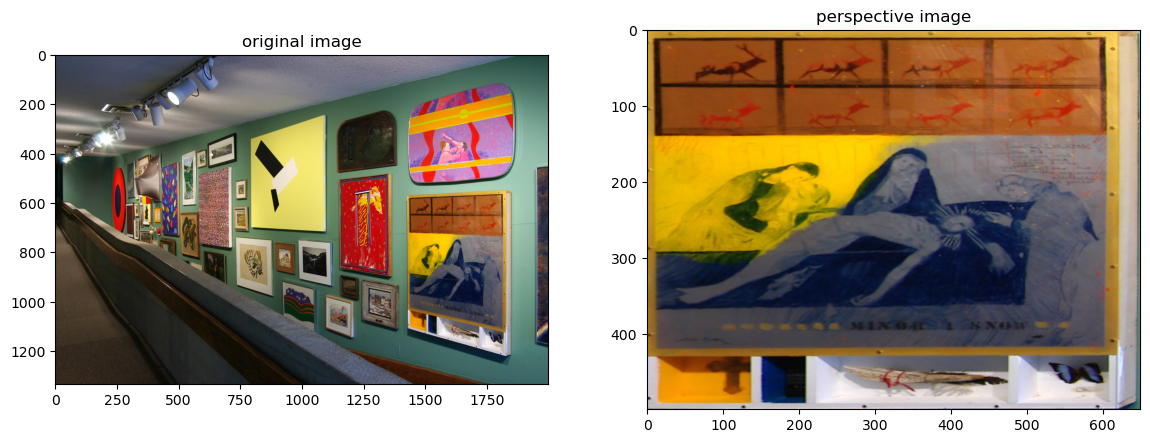

In [10]:
import numpy as np
import cv2

imgBGR = cv2.imread("Gallery.bmp", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
nr, nc = img1.shape[:2]
#------------------- Code Here -------------------#  
pts1 = np.float32( [ [1430,570],[1430,1110],[1850,1230],[1850,550] ] )
pts2 = np.float32( [ [ 0, 0 ], [ 0, 500 ], [ 650, 500 ], [ 650, 0 ] ] )
#------------------- Code Here -------------------#  
T = cv2.getPerspectiveTransform( pts1, pts2 )
img2 = cv2.warpPerspective( img1, T, ( 650, 500 ) )
cv2.imwrite( "Gallery_perspec.bmp", img2 )
plt.figure(figsize=(14, 14))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(img1,cmap=plt.cm.jet)
plt.subplot(1,2,2)   
plt.title('perspective image') 
plt.imshow(img2,cmap=plt.cm.jet)